<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Connect to Db2 database on Cloud using Python


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Import the ibm_db Python library
* Enter the database connection credentials
* Create the database connection
* Close the database connection



__Note:__ Please follow the instructions given in the first Lab of this course to Create a database service instance of Db2 on Cloud and retrieve your database Service Credentials.

## Import the `ibm_db` Python library

The `ibm_db` [API ](https://pypi.python.org/pypi/ibm_db/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork22-2022-01-01) provides a variety of useful Python functions for accessing and manipulating data in an IBM® data server database, including functions for connecting to a database, preparing and issuing SQL statements, fetching rows from result sets, calling stored procedures, committing and rolling back transactions, handling errors, and retrieving metadata.


We first import the ibm_db library into our Python Application

Execute the following cells by clicking within it and then 
press `Shift` and `Enter` keys simultaneously

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you may need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [4]:
# These libraries are pre-installed in SN Labs. If running in another environment please uncomment lines below to install them:
!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
# Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
!pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
!pip install ipython-sql

     ------------------------------------ 797.3/797.3 kB 553.5 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.0/2.0 MB 580.4 kB/s eta 0:00:00
     ------------------------------------ 192.1/192.1 kB 387.7 kB/s eta 0:00:00
  Created wheel for ibm_db: filename=ibm_db-3.1.0-py3-none-any.whl size=27687109 sha256=1d408e1f02ac8d2cce7ee56d048d

  Using cached ibm_db-3.1.0-py3-none-any.whl
  Using cached ibm_db_sa-0.3.3-py3-none-any.whl
  Using cached SQLAlchemy-2.0.5.post1-cp39-cp39-win_amd64.whl (2.0 MB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached greenlet-2.0.2-cp39-cp39-win_amd64.whl (192 kB)
  Attempting uninstall: ibm_db
    Found existing installation: ibm-db 3.1.0
    Uninstalling ibm-db-3.1.0:
      Successfully uninstalled ibm-db-3.1.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.3.0
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
  Attempting uninstall: greenlet
    Found existing installation: greenlet 1.1.1
    Can't uninstall 'greenlet'. No files were found to uninstall.
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.5.post1
    Uninstalling SQLAlchemy-2.0.5.post1:
      Successfully uninstalled SQLAlchemy-2.0.5.post1


Found existing installation: SQLAlchemy 2.0.5.post1
Uninstalling SQLAlchemy-2.0.5.post1:
  Successfully uninstalled SQLAlchemy-2.0.5.post1
     ---------------------------------------- 1.2/1.2 MB 525.4 kB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.24 which is incompatible.


  Using cached SQLAlchemy-2.0.5.post1-cp39-cp39-win_amd64.whl (2.0 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.24
    Uninstalling SQLAlchemy-1.3.24:
      Successfully uninstalled SQLAlchemy-1.3.24


In [8]:
import ibm_db

When the command above completes, the `ibm_db` library is loaded in your notebook. 


## Identify the database connection credentials

Connecting to dashDB or DB2 database requires the following information:
* Driver Name
* Database name 
* Host DNS name or IP address 
* Host port
* Connection protocol
* User ID (or username)
* User Password



__Notice:__ To obtain credentials please refer to the instructions given in the first Lab of this course

Now enter your database credentials below and execute the cell with `Shift` + `Enter`


In [9]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "2d46b6b4-cbf6-40eb-bbce-6251e6ba0300.bs2io90l08kqb1od8lcg.databases.appdomain.cloud" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "hbw13017"        # e.g. "abc12345"
dsn_pwd = "JC56XouHGptlK1Zb"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "32328"                # e.g. "32733" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"

## Create the DB2 database connection

Ibm_db API uses the IBM Data Server Driver for ODBC and CLI APIs to connect to IBM DB2 and Informix.


Lets build the dsn connection string using the credentials you entered above


In [10]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=2d46b6b4-cbf6-40eb-bbce-6251e6ba0300.bs2io90l08kqb1od8lcg.databases.appdomain.cloud;PORT=32328;PROTOCOL=TCPIP;UID=hbw13017;PWD=JC56XouHGptlK1Zb;SECURITY=SSL;


Now establish the connection to the database


In [11]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  BLUDB as user:  hbw13017 on host:  2d46b6b4-cbf6-40eb-bbce-6251e6ba0300.bs2io90l08kqb1od8lcg.databases.appdomain.cloud


Congratulations if you were able to connect successfuly. Otherwise check the error and try again.


In [12]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.05.0800
DB_NAME:    BLUDB


In [13]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           DB2CLI.DLL
DRIVER_VER:            11.05.0800
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1252
CONN_CODEPAGE:         1208


## Close the Connection
We free all resources by closing the connection. Remember that it is always important to close connections so that we can avoid unused connections taking up resources.


Verify Loaded Data Using SQL

In [14]:
stmt = ibm_db.exec_immediate(conn,"SELECT count(*) FROM MCDONT")

ibm_db.fetch_both(stmt)

{'1': 260, 0: 260}

In [16]:
import pandas 
import ibm_db_dbi

pconn = ibm_db_dbi.Connection(conn)
df = pandas.read_sql("SELECT * FROM MCDONT", pconn)
df

,CATEGORY,ITEM,SERVING_SIZE,CALORIES,CALORIES_FROM_FAT,TOTAL_FAT,TOTAL_FAT____DAILY_VALUE_,SATURATED_FAT,SATURATED_FAT____DAILY_VALUE_,TRANS_FAT,...,CARBOHYDRATES,CARBOHYDRATES____DAILY_VALUE_,DIETARY_FIBER,DIETARY_FIBER____DAILY_VALUE_,SUGARS,PROTEIN,VITAMIN_A____DAILY_VALUE_,VITAMIN_C____DAILY_VALUE_,CALCIUM____DAILY_VALUE_,IRON____DAILY_VALUE_
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [17]:
df.describe(include='all')

,CATEGORY,ITEM,SERVING_SIZE,CALORIES,CALORIES_FROM_FAT,TOTAL_FAT,TOTAL_FAT____DAILY_VALUE_,SATURATED_FAT,SATURATED_FAT____DAILY_VALUE_,TRANS_FAT,...,CARBOHYDRATES,CARBOHYDRATES____DAILY_VALUE_,DIETARY_FIBER,DIETARY_FIBER____DAILY_VALUE_,SUGARS,PROTEIN,VITAMIN_A____DAILY_VALUE_,VITAMIN_C____DAILY_VALUE_,CALCIUM____DAILY_VALUE_,IRON____DAILY_VALUE_
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Egg McMuffin,16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
### Categorical scatterplots

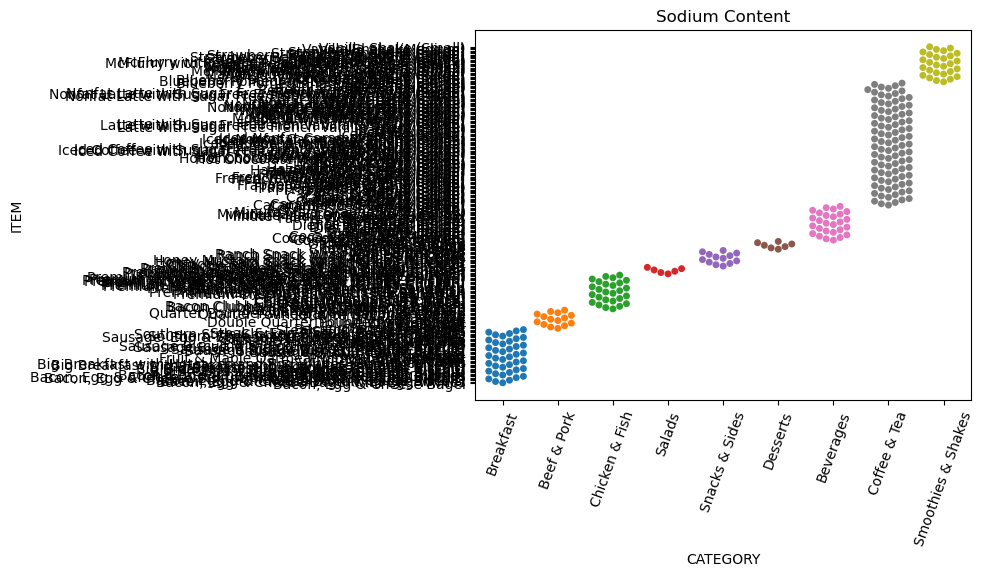

In [34]:


plot = sns.swarmplot(x = 'CATEGORY' , y = 'ITEM', data = df)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Sodium Content')
plt.show()

AttributeError: 'JointGrid' object has no attribute 'show'

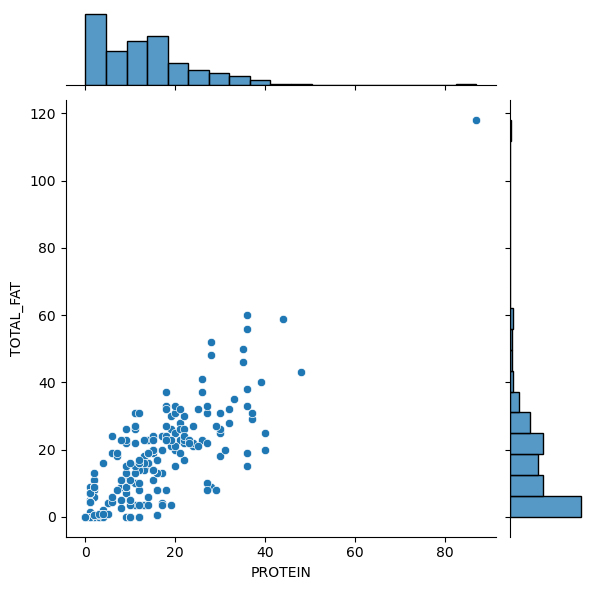

In [38]:
plot = sns.jointplot(x="PROTEIN", y='TOTAL_FAT', data = df)
plot.show()

AttributeError: 'NoneType' object has no attribute 'show'

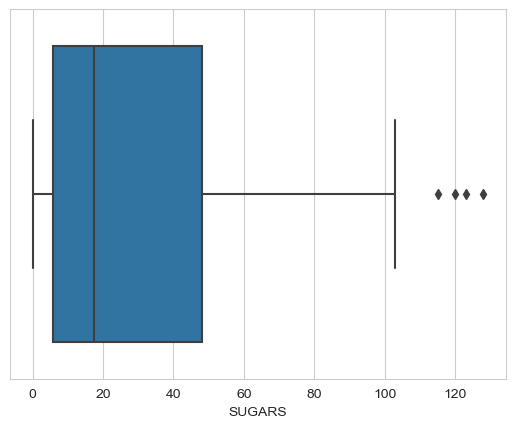

In [40]:
plot = sns.set_style("whitegrid")
ax = sns.boxplot(x=df["SUGARS"])
plot.show()

In [7]:
ibm_db.close

True

## Summary

In this tutorial you established a connection to a DB2 database on Cloud database from a Python notebook using ibm_db API. 


## Author

<a href="https://www.linkedin.com/in/ravahuja?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork22-2022-01-01">Rav Ahuja</a>


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2021-11-17  | 2.2  | Lakshmi  | Updated library  |
| 2021-07-09  | 2.1  | Malika   | Updated the connection string  |
| 2020-08-28  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab  |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
